In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\kevin\Downloads\global_heat_index.csv")

## Cleaning data

In [3]:
clean1 = data[data['Hour']<6]
clean2 = data[data['Hour']>18]

In [4]:
data.drop(clean1.index,inplace=True)
data.drop(clean2.index,inplace=True)

In [5]:
data.shape

(9490, 11)

In [6]:
x = data.iloc[:,0:10].values
y = data.iloc[:,-1].values

In [7]:
y = y.reshape(-1,1)

In [8]:
y

array([[  0],
       [  0],
       [159],
       ...,
       [221],
       [ 16],
       [  0]], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
print(x_train)

[[2.01200000e+03 7.00000000e+00 3.10000000e+01 ... 7.20065074e+01
  2.30574677e+02 3.48527336e+00]
 [2.01200000e+03 1.10000000e+01 4.00000000e+00 ... 2.18277261e+01
  4.39257546e+01 1.79098237e+00]
 [2.01200000e+03 5.00000000e+00 2.30000000e+01 ... 9.19367135e+00
  2.56100769e+02 2.31313491e+00]
 ...
 [2.01200000e+03 1.00000000e+00 9.00000000e+00 ... 3.46843778e+01
  9.09429932e+00 1.42941236e+00]
 [2.01100000e+03 9.00000000e+00 9.00000000e+00 ... 9.50179276e+01
  2.11733612e+02 2.95700026e+00]
 [2.01100000e+03 7.00000000e+00 3.00000000e+01 ... 8.35370614e+01
  2.39046616e+02 2.56590128e+00]]


In [12]:
print(y_train)

[[178]
 [602]
 [830]
 ...
 [231]
 [162]
 [384]]


## Standardizing data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [14]:
x_train

array([[ 0.9950072 ,  0.13925687,  1.72688541, ...,  1.20221031,
         0.39135863,  0.85990992],
       [ 0.9950072 ,  1.300419  , -1.33105288, ..., -0.76144896,
        -1.50792046, -0.50344039],
       [ 0.9950072 , -0.4413242 ,  0.82082962, ..., -1.2558607 ,
         0.65110389, -0.08327831],
       ...,
       [ 0.9950072 , -1.60248634, -0.76476801, ..., -0.25832627,
        -1.86235409, -0.79438603],
       [-1.00501786,  0.71983793, -0.76476801, ...,  2.10272218,
         0.19963805,  0.43482279],
       [-1.00501786,  0.13925687,  1.61362844, ...,  1.65343846,
         0.47756634,  0.12011598]])

In [15]:
y_train

array([[-0.83425739],
       [ 0.55048309],
       [ 1.29510768],
       ...,
       [-0.66116483],
       [-0.88651175],
       [-0.16148254]])

## K-Means Clustering 

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,random_state=0)
kmeans = kmeans.fit(x_train)

C:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
labels = kmeans.labels_
print("Labels:",labels)
cluster_centers = kmeans.cluster_centers_
print("Cluster Center",cluster_centers)

Labels: [5 0 2 ... 3 1 1]
Cluster Center [[ 0.03123673  1.35438576  0.21197837 -0.06968761 -0.15226553 -0.655999
   0.9444306   0.08094306 -0.86516247 -0.59221511]
 [-1.00501786  0.49734398 -0.01996252  0.04506887  1.10455826  0.03037317
  -0.75156404  1.19641256  0.41516347 -0.12782247]
 [ 0.11568584 -0.92972968 -0.05438968  0.35098243 -1.000288    0.51854121
   0.14418421 -1.05351141  0.82561184 -0.073453  ]
 [-0.10862505 -1.3121958  -0.14399685 -0.44293079 -1.03575655 -1.03847847
   1.01040958 -0.45896156 -1.07753088 -0.29847892]
 [ 0.1530586  -0.24879633  0.05339893  0.1101188   0.37576192  1.09318174
  -1.0739234  -0.44534648  0.5134008   1.48579563]
 [ 0.9950072   0.57161071 -0.10858757 -0.04137971  1.04084193  0.10541779
  -0.55414125  0.98477367  0.28963867 -0.36779824]]


## Applying PCA - Dimensionality Reduction

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(x_train).transform(x_train)

In [19]:
pca

array([[-1.44858897,  0.74973869],
       [ 0.93544556,  0.29645102],
       [-0.30631718, -2.06534836],
       ...,
       [ 2.91439388,  0.04595738],
       [-1.56338535,  2.22188817],
       [-1.62261472,  1.53891548]])

In [20]:
pca.shape

(7592, 2)

In [21]:
x_train.shape

(7592, 10)

## Visualization

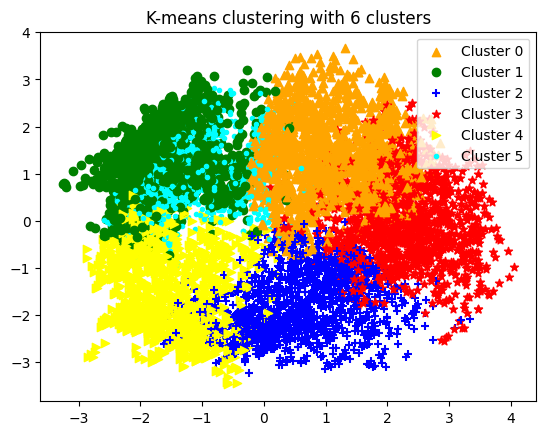

In [26]:
for i in range(0,pca.shape[0]):
    if kmeans.labels_[i]==0:
        c1_6 = plt.scatter(pca[i,0],pca[i,1],c="orange",marker="^")
    if kmeans.labels_[i]==1:
        c2_6 = plt.scatter(pca[i,0],pca[i,1],c="g",marker="o")
    if kmeans.labels_[i]==2:
        c3_6 = plt.scatter(pca[i,0],pca[i,1],c="b",marker="+")
    if kmeans.labels_[i]==3:
        c4_6 = plt.scatter(pca[i,0],pca[i,1],c="red",marker="*")
    if kmeans.labels_[i]==4:
        c5_6 = plt.scatter(pca[i,0],pca[i,1],c="yellow",marker=">")
    if kmeans.labels_[i]==5:
        c6_6 = plt.scatter(pca[i,0],pca[i,1],c="cyan",marker=".")    
plt.rcParams["figure.figsize"] = (12,10)
plt.legend([c1_6,c2_6,c3_6,c4_6,c5_6,c6_6],['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
plt.title('K-means clustering with 6 clusters')
plt.show()